# Predicting Car Prices
The main goal of this project will be to create a regression algorithm to predict the prices of cars given some features. Some steps we will go through to build a model and get the predictions are:

1. Visualizing the data to gain insights on how to move forward
2. Cleaning the data to prepare it for training
3. Building the model

## Initializing and Visualizing the Data

Let's start off by importing the necessary libraries for this project and loading the data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

car_data=pd.read_csv('CarPriceData.csv')

Next, let's take a quick look at the data structure. From here we can see what we are working with and roughly plot some next steps:


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

It looks like market category has a lot of null values, we will deal with it later when when have finished getting a good scope of the data and what we are working with. Other than that we can see there aren't a lot of null values in the other categories however, there are a lot of data types that are not numerical. Lets look at the first few entries in the data:

In [ ]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car_data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Let's look at some of the categorical data types further to see if we can maybe refactor them into a numerical type or if it would be better to drop them altogether:

In [ ]:
car_data['Engine Fuel Type'].value_counts()

,count
Engine Fuel Type,
regular unleaded,7172
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,66
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


In [ ]:
car_data['Transmission Type'].value_counts()

,count
Transmission Type,
AUTOMATIC,8266
MANUAL,2935
AUTOMATED_MANUAL,626
DIRECT_DRIVE,68
UNKNOWN,19


In [ ]:
car_data['Driven_Wheels'].value_counts()

,count
Driven_Wheels,
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


In [ ]:
car_data['Vehicle Style'].value_counts()

,count
Vehicle Style,
Sedan,3048
4dr SUV,2488
Coupe,1211
Convertible,793
4dr Hatchback,702
Crew Cab Pickup,681
Extended Cab Pickup,623
Wagon,592
2dr Hatchback,506


In [ ]:
car_data['Market Category'].value_counts()

,count
Market Category,
Crossover,1110
Flex Fuel,872
Luxury,855
"Luxury,Performance",673
Hatchback,641
...,...
"Crossover,Exotic,Luxury,Performance",1
"Exotic,Luxury,High-Performance,Hybrid",1
"Crossover,Exotic,Luxury,High-Performance",1


Looking at these columns, we can drop some of the categories as they would be extraneous in our predictions. We will deal with them when we get to cleaning. Let's now look at a rough summary of our numerical data types:

In [ ]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


The data looks pretty clean, however we will need to drop some values in the highway and city mpg columns as it seems unreasonable that a car can get 350 miles per gallon.

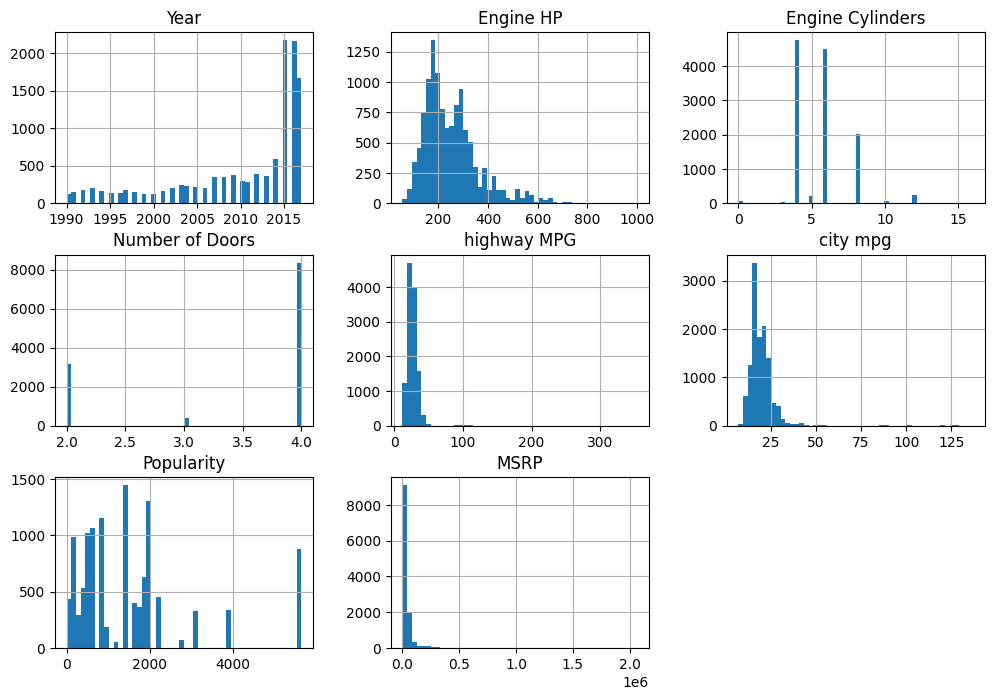

In [ ]:
car_data.hist(bins = 50, figsize = (12,8))
plt.show()

Let's look at some of the correlations to see if they will help us in determining what to keep:

In [ ]:
correlations=car_data.corr(numeric_only=True)      # There are still some non-numeric
correlations['MSRP'].sort_values(ascending=False)  # columns


,MSRP
MSRP,1.000000
Engine HP,0.662008
Engine Cylinders,0.531312
Year,0.227590
Popularity,-0.048476
Number of Doors,-0.126635
city mpg,-0.157676
highway MPG,-0.160043


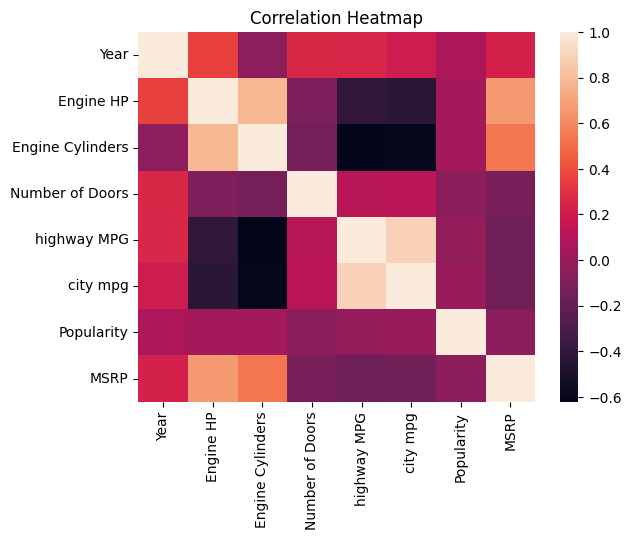

In [ ]:
sns.heatmap(correlations)
plt.title('Correlation Heatmap')
plt.show()

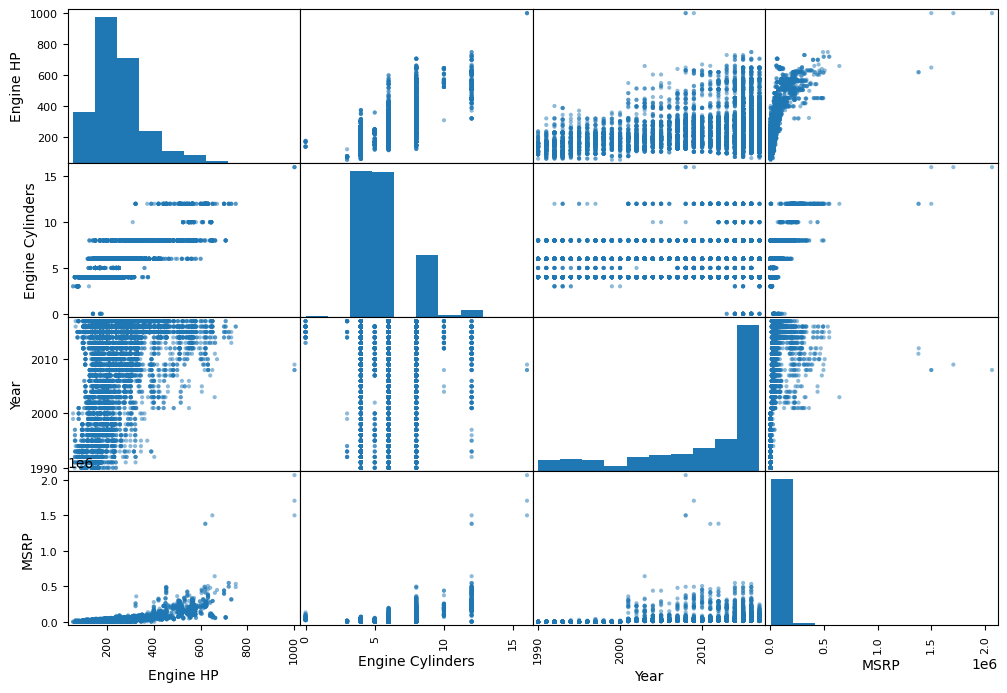

In [ ]:
features=['Engine HP','Engine Cylinders','Year', 'MSRP']
from pandas.plotting import scatter_matrix
scatter_matrix(car_data[features], figsize=(12,8))
plt.show()

# Cleaning the Data

Recall the .info() function on the training set:

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Looking at the market category column, it seems that there are a significant amount of null values, not only that but the labels given in the column itself have many classifications for each entry which would make it cumbersome to encode even if there weren't so many missing values. It would be best to drop this column altogether. Let us also separate the MSRP (what we are trying to predict) and the rest of the data

In [ ]:
car_data.drop('Market Category', axis=1, inplace=True)

Lets drop the unreasonable values in the highway and city mpg columns:

In [ ]:
car_data['highway MPG'].value_counts().sort_values()


,count
highway MPG,
94,1
98,1
354,1
108,1
106,2
103,2
97,2
110,2
107,2


In [ ]:
car_data = car_data[car_data['highway MPG'] < 60]

In [ ]:
car_data['city mpg'].value_counts().sort_values()

,count
city mpg,
7,1
47,2
38,2
58,2
55,3
49,4
51,6
50,6
39,7


In [ ]:
car_data = car_data[car_data['city mpg'] < 60]

Some of the numeric categories have some null values, not much but they're there. Let us fill these in using the median:

In [ ]:
fill_array = ['Engine HP','Engine Cylinders','Number of Doors']
car_data.fillna(car_data[fill_array].median(), inplace=True)

In [ ]:
car_data.info()
print(car_data[fill_array].median())

<class 'pandas.core.frame.DataFrame'>
Index: 11847 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11847 non-null  object 
 1   Model              11847 non-null  object 
 2   Year               11847 non-null  int64  
 3   Engine Fuel Type   11844 non-null  object 
 4   Engine HP          11847 non-null  float64
 5   Engine Cylinders   11847 non-null  float64
 6   Transmission Type  11847 non-null  object 
 7   Driven_Wheels      11847 non-null  object 
 8   Number of Doors    11847 non-null  float64
 9   Vehicle Size       11847 non-null  object 
 10  Vehicle Style      11847 non-null  object 
 11  highway MPG        11847 non-null  int64  
 12  city mpg           11847 non-null  int64  
 13  Popularity         11847 non-null  int64  
 14  MSRP               11847 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB
Engine HP         

Next, let's refactor some of the categorical features into numeric ones.

In [ ]:
features=['Make','Model','Engine Fuel Type','Transmission Type',
          'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
car_data=pd.get_dummies(car_data, columns=features)
car_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False


The msrp histogram seems to be heavily right skewed, this will be a problem in making predictions. Let's transform it with the log function so it takes on a more normal curve:

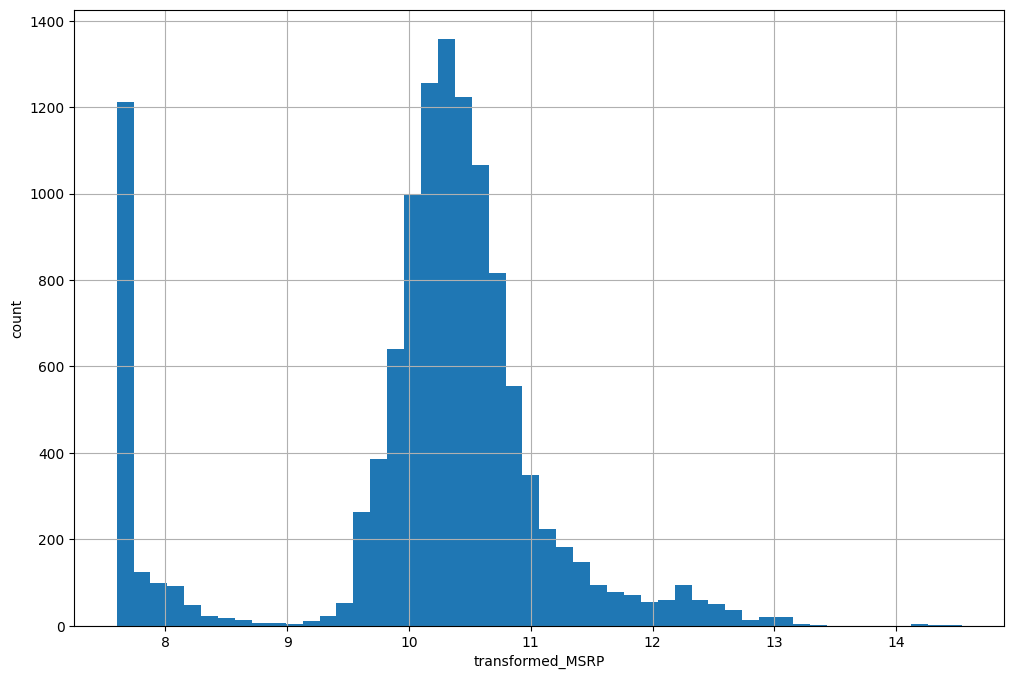

In [ ]:
car_data['transformed_MSRP']=np.log1p(car_data['MSRP'])
car_data['transformed_MSRP'].hist(bins=50, figsize=(12,8))
plt.xlabel('transformed_MSRP')
plt.ylabel('count')
plt.show()

car_data.drop('MSRP', axis=1, inplace=True)

# Model Selection

Let us now split the data into training and test sets. We will split the data into x and y labels as we haven't separated the prediction variable beforehand.

In [ ]:
from sklearn.model_selection import train_test_split
x = car_data.drop('transformed_MSRP', axis=1)
y = car_data['transformed_MSRP']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

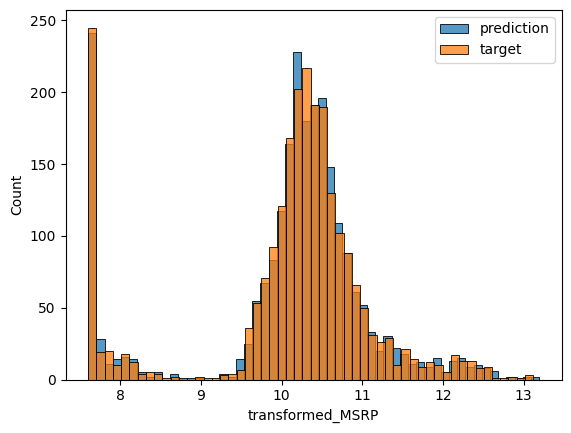

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

sns.histplot(prediction, label='prediction')
sns.histplot(y_test, label='target')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, prediction)
print(f'R² Score: {r2}')

Mean Absolute Error: 0.07615987302791022
Mean Squared Error: 0.011419956806333236
R² Score: 0.99074587256446


### Notes:
I tried using a linear regression model before the decision tree however, it crashed, I took this as a sign to use a different model. I also experimented with keeping and removing values to see how it affected the final model.